In [1]:
import nltk

In [2]:
#nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CE

      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [35]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [36]:
len(messages)

5574

In [37]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [38]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [50]:
import pandas as pd

In [51]:
#seperate by tab
messages = pd.read_csv('SMSSpamCollection',sep='\t', names = ['label','message'])

In [52]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [53]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [54]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [55]:
messages['length'] = messages['message'].apply(len)

In [56]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
%matplotlib inline

<Axes: ylabel='Frequency'>

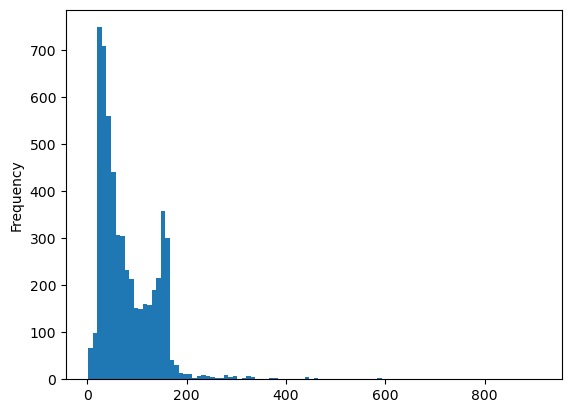

In [59]:
messages['length'].plot.hist(bins = 100)
#text length maybe a good feature for detecting spam

In [60]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [61]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

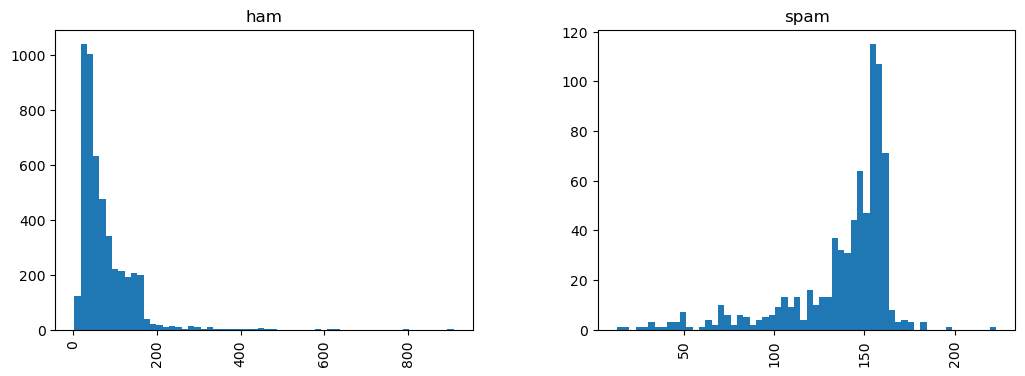

In [62]:
messages.hist(column ='length', by ='label',bins =60, figsize=(12,4))

In [63]:
import string

In [64]:
mess = 'Sample message! Notice: it has punctuation.'

In [65]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [66]:
nopunc = [c for c in mess if c not in string.punctuation]

In [67]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [68]:
from nltk.corpus import stopwords

In [69]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [70]:
nopunc = ''.join(nopunc) #join the character with specified string, in this case, it is a null string

In [71]:
nopunc

'Sample message Notice it has punctuation'

In [72]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [76]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [77]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [82]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]








In [83]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [84]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])
#creating a 2d matrix

In [87]:

print(len(bow_transformer.vocabulary_))

11425


In [90]:
mess4  = messages['message'][3]
print(mess4)

U dun say so early hor... U c already then say...


In [91]:
bow4 = bow_transformer.transform([mess4])

In [92]:
print(bow4) # this essentially means there 7 words after removing the stop wordes, 2 implies appear twice

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [93]:
print(bow4.shape)

(1, 11425)


In [101]:
print(bow_transformer.get_feature_names_out()[4068])
print(bow_transformer.get_feature_names_out()[9554])

U
say


In [104]:
messages_bow = bow_transformer.transform(messages['message'])

In [105]:
print('Shape of Spare Matrix', messages_bow.shape)

Shape of Spare Matrix (5572, 11425)


In [106]:
#check non-zeros
messages_bow.nnz

50548

In [108]:
#sparsity
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [109]:
from sklearn.feature_extraction.text import TfidfTransformer

In [110]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [111]:

tfidf4 = tfidf_transformer.transform(bow4)

In [113]:
# the weight of each word in the context of entire corpse
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [114]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [115]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [116]:
messages_tfidf

<5572x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [117]:
from sklearn.naive_bayes import MultinomialNB

In [118]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [119]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [120]:
messages['label'][3]

'ham'

In [121]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [122]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [126]:
from sklearn.model_selection import train_test_split

In [130]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [131]:
msg_train

4928                               Wanna do some art?! :D
3039    You are not bothering me but you have to trust...
929                               Oh all have to come ah?
2242                            U buy newspapers already?
135     Want 2 get laid tonight? Want real Dogging loc...
                              ...                        
3233    Guess he wants alone time. We could just show ...
3834    I had askd u a question some hours before. Its...
4960    What i mean was i left too early to check, cos...
4145     That's a shame! Maybe cld meet for few hrs tomo?
4590         Have you not finished work yet or something?
Name: message, Length: 3900, dtype: object

In [134]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process))
    ,('tfidf',TfidfTransformer()),
    ('classifier', MultinomialNB())
    
])

In [135]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fb8db2bca60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [136]:
predictions = pipeline.predict(msg_test)

In [141]:
from sklearn.metrics import classification_report,confusion_matrix

In [140]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1472
        spam       1.00      0.70      0.82       200

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.97      0.96      0.96      1672



In [142]:
confusion_matrix(label_test,predictions)

array([[1472,    0],
       [  60,  140]])